In [1]:
### SETUP

%pip install networkx
%pip install numpy
%pip install matplotlib
%pip install torch
import torch
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv
from matplotlib.colors import Normalize
import torch.nn as nn
import torch.nn.functional as F


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


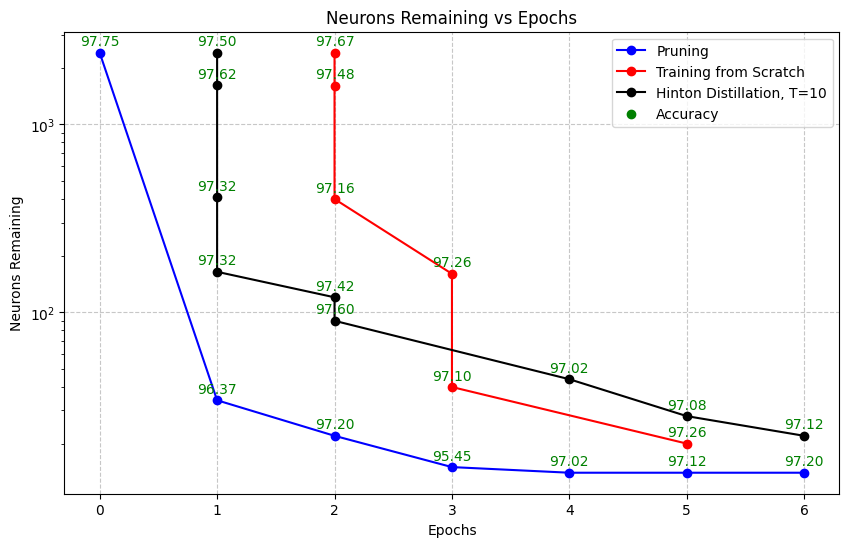

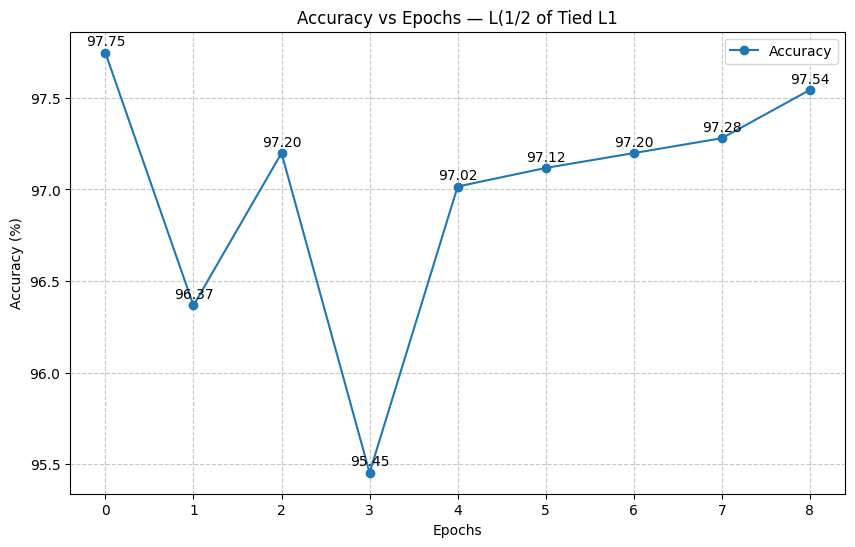

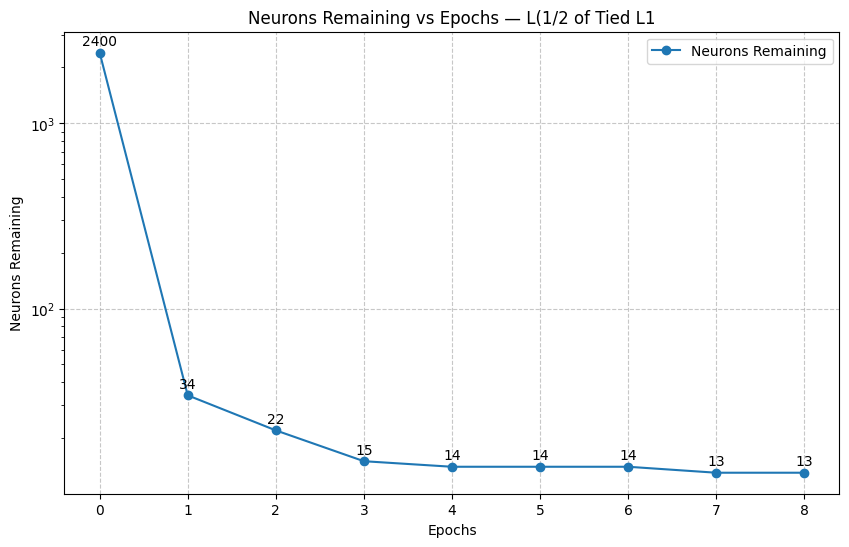

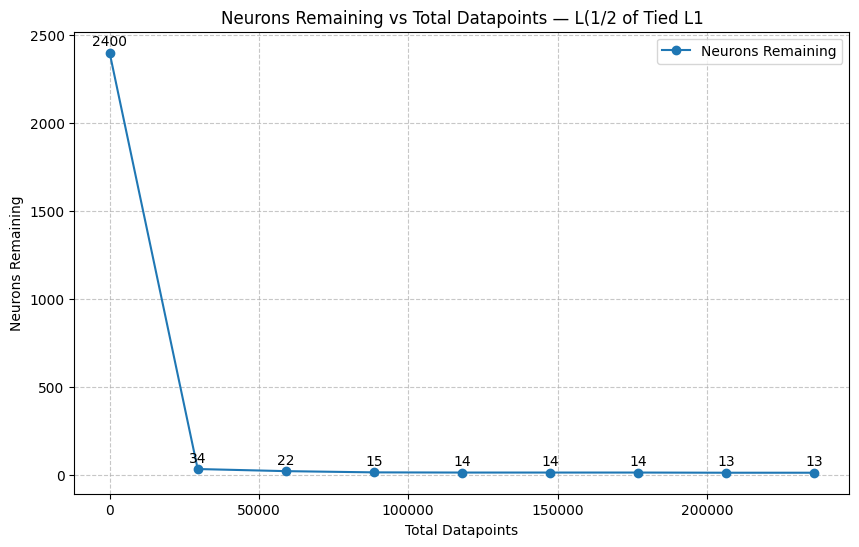

In [18]:
### METHODS FOR VISUALIZING PRUNING DATA
def load_accuracies_by_neurons(filepath):
    """Load data from a CSV file with columns Active Neurons, Beta, and Accuracy."""
    data = []
    with open(filepath, mode='r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            active_neurons = int(row['Active Neurons'])
            beta = float(row['Beta'])
            accuracy = float(row['Accuracy'])
            epoch = int(row['Epoch']) 
            total_datapoints = int(row['Total Datapoints']) 
            data.append({
                'Active Neurons': active_neurons,
                'Beta': beta,
                'Accuracy': accuracy,
                'Epoch': epoch,
                'Total Datapoints': total_datapoints,
            })
    return data


def plot_epochs_vs_neurons(data):
    """Plot Neurons Remaining versus Actual Epochs."""
    plt.figure(figsize=(10, 6))
    epochs = [d['Epoch'] for d in data] 
    neurons_remaining = [d['Active Neurons'] for d in data]
    
    plt.plot(epochs, neurons_remaining, 'o-', label='Neurons Remaining')
    for x, y in zip(epochs, neurons_remaining):
        plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')
    plt.xlabel('Epochs')
    plt.ylabel('Neurons Remaining')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Neurons Remaining vs Epochs — L(1/2 of Tied L1')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

def plot_epochs_vs_accuracy(data):
    """Plot Accuracy versus Actual Epochs."""
    plt.figure(figsize=(10, 6))
    epochs = [d['Epoch'] for d in data]
    accuracies = [d['Accuracy'] for d in data]
    
    plt.plot(epochs, accuracies, 'o-', label='Accuracy')
    for x, y in zip(epochs, accuracies):
        plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Epochs — L(1/2 of Tied L1')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()


def plot_epochs_vs_neurons_with_accuracy_labels(data, first_filepath, second_filepath):
    """Plot Neurons Remaining versus Actual Epochs, with points labeled by Accuracy."""
    # REMOVE THIS
    data = data[:-2]

    plt.figure(figsize=(10, 6))

    # Plot original data
    epochs = [d['Epoch'] for d in data]
    neurons_remaining = [d['Active Neurons'] for d in data]
    accuracies = [d['Accuracy'] for d in data]
    
    plt.plot(epochs, neurons_remaining, 'o-', label='Pruning', color='blue')
    for x, y, acc in zip(epochs, neurons_remaining, accuracies):
        plt.annotate(f'{acc:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='green')
    
    # Load and plot data from first CSV
    with open(first_filepath, mode='r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)
        csv_epochs = []
        csv_neurons_remaining = []
        csv_accuracies = []
        for row in rows[1:]:
            csv_epochs.append(int(row['Epoch']))
            csv_neurons_remaining.append(int(row['Neurons Remaining']))
            csv_accuracies.append(float(row['Accuracy']))
    
    plt.plot(csv_epochs, csv_neurons_remaining, 'o-', label='Training from Scratch', color='red')
    for x, y, acc in zip(csv_epochs, csv_neurons_remaining, csv_accuracies):
        plt.annotate(f'{acc:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='green')
    

    # Load and plot data from second CSV
    with open(second_filepath, mode='r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)
        csv_epochs = []
        csv_neurons_remaining = []
        csv_accuracies = []
        for row in rows[:]:
            csv_epochs.append(int(row['Epoch']))
            csv_neurons_remaining.append(int(row['Neurons Remaining']))
            csv_accuracies.append(float(row['Accuracy']))

    plt.plot(csv_epochs, csv_neurons_remaining, 'o-', label='Hinton Distillation, T=10', color='black')
    for x, y, acc in zip(csv_epochs, csv_neurons_remaining, csv_accuracies):
        plt.annotate(f'{acc:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='green')

    plt.xlabel('Epochs')
    plt.ylabel('Neurons Remaining')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Neurons Remaining vs Epochs')
    plt.grid(True, linestyle='--', alpha=0.7)
    

    # Add a legend entry for accuracy labels
    plt.scatter([], [], color='green', label='Accuracy')
    plt.legend(loc='upper right')
    
    plt.show()

data = load_accuracies_by_neurons('./data/tied_l2_with_lhalf/pruning_accuracies_run14.csv')
trained_from_scratch =  "/afs/csail.mit.edu/u/a/asher/distillation/data/training_accuracies_updated.csv"
hinton_csv = "/afs/csail.mit.edu/u/a/asher/distillation/data/student_training_accuracies.csv"
plot_epochs_vs_neurons_with_accuracy_labels(data, trained_from_scratch, hinton_csv)
plot_epochs_vs_accuracy(data)
plot_epochs_vs_neurons(data)

In [ ]:
def plot_total_datapoints_vs_neurons(data):
    """Plot Total Datapoints versus Neurons Remaining."""
    plt.figure(figsize=(10, 6))
    total_datapoints = [d['Total Datapoints'] for d in data]
    neurons_remaining = [d['Active Neurons'] for d in data]
    
    plt.plot(total_datapoints, neurons_remaining, 'o-', label='Neurons Remaining')
    for x, y in zip(total_datapoints, neurons_remaining):
        plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')
    plt.xlabel('Total Datapoints')
    plt.ylabel('Neurons Remaining')
    plt.title('Neurons Remaining vs Total Datapoints — L(1/2 of Tied L1')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [2]:
### METHODS FOR VISUALIZING HINTON DATA

def load_accuracies_from_csv(filepath):
    """Load Hinton Accuracies from a CSV"""
    data = []
    with open(filepath, mode='r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            hidden_dim = int(row['hidden_dim'])
            temp = row.get('temperature', 'N/A')
            temperature = None if temp == 'N/A' else float(temp)
            accuracy = float(row['accuracy'])
            data.append({
                'Hidden Dimension': hidden_dim,
                'Temperature': temperature,
                'Accuracy': accuracy
            })
    return data


def plot_performance(data):
    """Plot performance of Hinton method"""
    #optional: filter out certain dimensions
    # data = [d for d in data if d['Hidden Dimension'] != 20 and d['Hidden Dimension'] != 80]

    plt.figure(figsize=(10, 6))
    hidden_dims = sorted(set(d['Hidden Dimension'] for d in data))
    temperatures = sorted(set(d['Temperature'] for d in data if d['Temperature'] is not None))
    
    for temp in temperatures:
        temp_data = [d for d in data if d['Temperature'] == temp]
        if temp_data:
            dims = [d['Hidden Dimension'] for d in temp_data]
            accs = [d['Accuracy'] for d in temp_data]
            plt.plot(dims, accs, 'o-', label=f'Temperature {temp}')
    
    
    plt.xlabel('Hidden Dimension')
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracies by Hidden Dimension and Temperature')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

data = load_accuracies_from_csv("example")
plot_performance(data)

In [3]:
### OTHER MISCELLANEOUS VISUALIZATIONS

import torch
import torch.nn as nn
class StudentNet(nn.Module):
    def __init__(self, hidden_dim):
        super(StudentNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class Net(nn.Module):
    def __init__(self, input_dim=28 * 28, hidden_dims=[1200, 1200], output_dim=10):
        super(Net, self).__init__()
        self.fc_layers = nn.ModuleList()
        previous_dim = input_dim
        for h_dim in hidden_dims:
            self.fc_layers.append(nn.Linear(previous_dim, h_dim))
            previous_dim = h_dim
        self.output_layer = nn.Linear(previous_dim, output_dim)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        for fc in self.fc_layers:
            x = F.relu(fc(x))
        x = self.output_layer(x)
        return x

In [7]:

def plot_network_weights(model_path):
    """Plots the density of network weights, in the structure of its architecture"""
    import torch
    import torch.nn as nn
    import networkx as nx
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize
    import torch.nn.functional as F

    # Define the model class as per pruning.py
    class Net(nn.Module):
        def __init__(self, input_dim=28 * 28, hidden_dims=[1200, 1200], output_dim=10):
            super(Net, self).__init__()
            self.fc_layers = nn.ModuleList()
            previous_dim = input_dim
            for h_dim in hidden_dims:
                self.fc_layers.append(nn.Linear(previous_dim, h_dim))
                previous_dim = h_dim
            self.output_layer = nn.Linear(previous_dim, output_dim)

        def forward(self, x):
            x = x.view(-1, 28 * 28)
            for fc in self.fc_layers:
                x = F.relu(fc(x))
            x = self.output_layer(x)
            return x

    # Initialize the model with the correct architecture
    model = Net(hidden_dims=[200, 200])

    # Load the state_dict into the model
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)

    # create directed graph
    G = nx.DiGraph()

    # Extract layers
    layers = []
    for idx, layer in enumerate(model.fc_layers):
        if isinstance(layer, nn.Linear):
            layers.append((f"fc_layers.{idx}", layer))
    layers.append(("output_layer", model.output_layer))

    # Build nodes and edges
    layer_num = 0
    for _, layer in layers:
        if isinstance(layer, nn.Linear):
            weights = layer.weight.data.cpu().numpy()
            output_size, input_size = weights.shape
            source_nodes = [f"Layer {layer_num} Node {i}" for i in range(input_size)]
            target_nodes = [f"Layer {layer_num + 1} Node {i}" for i in range(output_size)]
            # Add nodes
            G.add_nodes_from(source_nodes)
            G.add_nodes_from(target_nodes)
            
            # Add edges with weights
            for i, source in enumerate(source_nodes):
                for j, target in enumerate(target_nodes):
                    weight = weights[j, i]
                    G.add_edge(source, target, weight=abs(weight))
            
            layer_num += 1


    # Create a custom layout to reflect the neural network structure
    pos = {}
    layer_sizes = [model.fc_layers[0].in_features] + [layer.out_features for layer in model.fc_layers] + [model.output_layer.out_features]
    y_offset = 0
    for layer_idx, layer_size in enumerate(layer_sizes):
        x_offset = 0
        print(layer_size)
        for node_idx in range(layer_size):
            pos[f"Layer {layer_idx} Node {node_idx}"] = (x_offset, y_offset)
            x_offset += 1
        y_offset -= 1

    # Print the number of positions assigned
    print(f"Total positions assigned: {len(pos)}")

    not_assigned = 0
    for node in G.nodes():
        if node not in pos:
            not_assigned += 1
            pos[node] = (0, 0)  # Default position if not assigned
    print(f"Nodes not assigned: {not_assigned}")

    edges = G.edges(data=True)
    edge_weights = [d['weight'] for (_, _, d) in edges]

    # Normalize weights for color mapping
    norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
    edge_colors = [plt.cm.binary(norm(w)) for w in edge_weights]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=False)
    # nx.draw_networkx_labels(G, pos, font_size=8)  # This line is removed to hide node labels

    sm = plt.cm.ScalarMappable(cmap=plt.cm.binary, norm=norm)
    sm.set_array(edge_weights)
    # cbar = plt.colorbar(sm)
    # cbar.set_label('Weight Magnitude', rotation=270, labelpad=15)

    plt.title(f"Network Weight Density for {model_path}")
    plt.axis('off')
    plt.show()

/tmp/ipykernel_2357112/2844711205.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


784
200
200
10
Total positions assigned: 1194
Nodes not assigned: 0


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

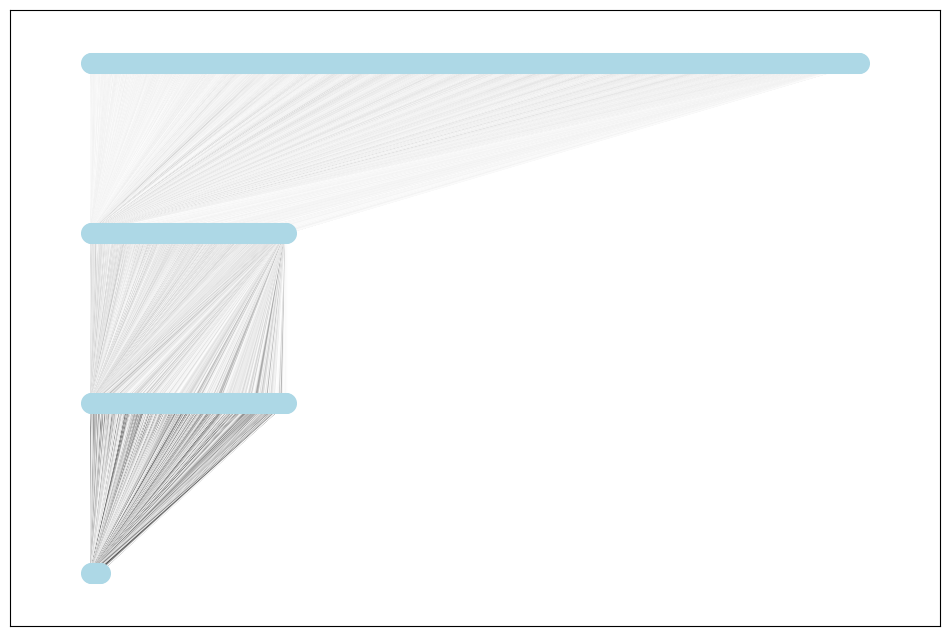

In [48]:
# Visualize the teacher model weights
plot_network_weights('models/teacher_hidden200.pth')

In [46]:
import torch
import matplotlib.pyplot as plt

def plot_weight_distributions(model_path):

    # Define the model class as per pruning.py
    class Net(nn.Module):
        def __init__(self, input_dim=28 * 28, hidden_dims=[1200, 1200], output_dim=10):
            super(Net, self).__init__()
            self.fc_layers = nn.ModuleList()
            previous_dim = input_dim
            for h_dim in hidden_dims:
                self.fc_layers.append(nn.Linear(previous_dim, h_dim))
                previous_dim = h_dim
            self.output_layer = nn.Linear(previous_dim, output_dim)

        def forward(self, x):
            x = x.view(-1, 28 * 28)
            for fc in self.fc_layers:
                x = F.relu(fc(x))
            x = self.output_layer(x)
            return x

    # Initialize the model with the correct architecture
    model = Net(hidden_dims=[200, 200])

    # Load the state_dict into the model
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)

    """Plots histograms of the weight distributions for each layer in the model."""
    for i, layer in enumerate(model.fc_layers):
        weights = layer.weight.data.cpu().numpy().flatten()
        plt.figure(figsize=(8, 4))
        plt.hist(weights, bins=50, alpha=0.7, color='blue')
        plt.title(f'Layer {i} Weight Distribution')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Plot for the output layer
    output_weights = model.output_layer.weight.data.cpu().numpy().flatten()
    plt.figure(figsize=(8, 4))
    plt.hist(output_weights, bins=50, alpha=0.7, color='green')
    plt.title('Output Layer Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


/tmp/ipykernel_2357112/1895955806.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)


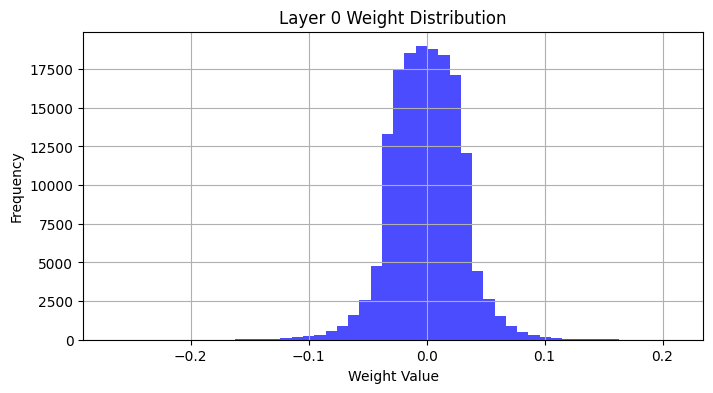

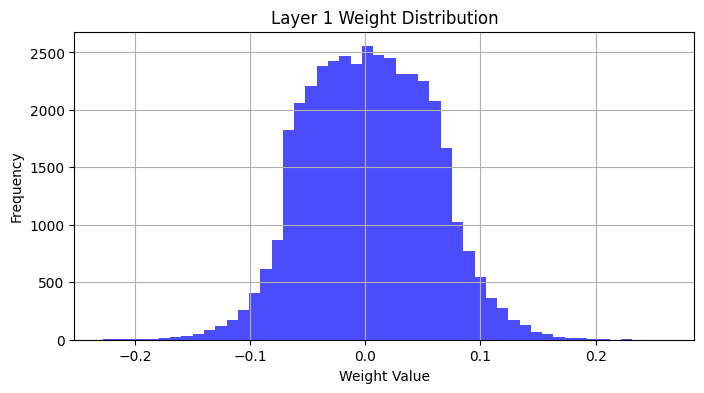

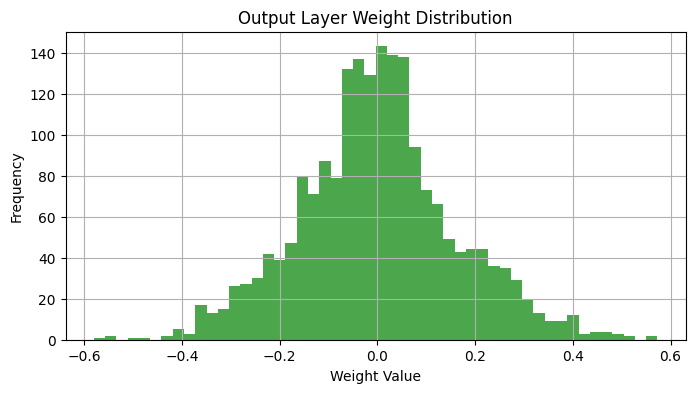

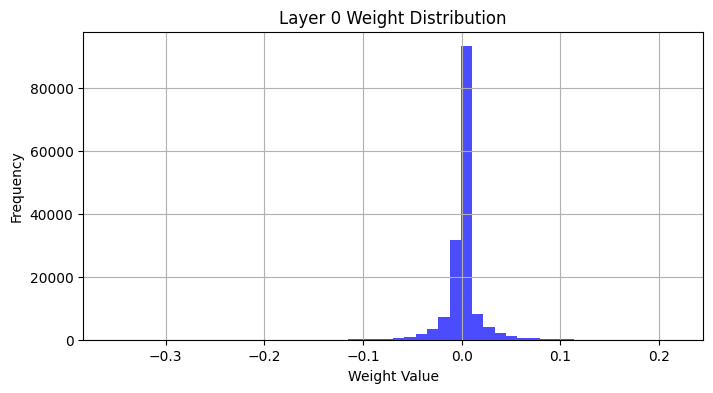

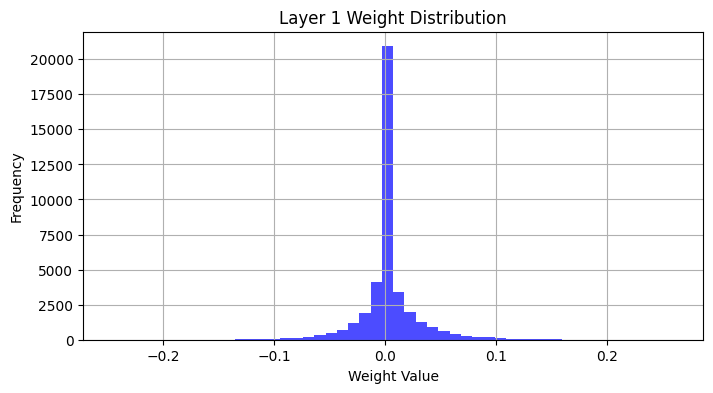

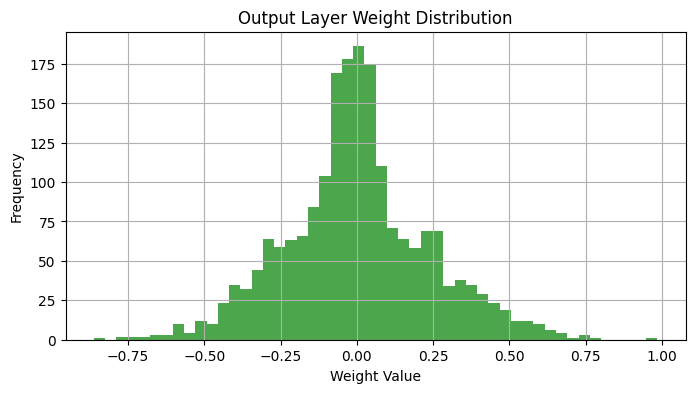

In [47]:
plot_weight_distributions('models/teacher_hidden200.pth')
plot_weight_distributions("models/student_hidden200_beta0.001.pth")